# Introdução à Inteligência Artificial 2021/2022


# Redes Neuronais

## Conteúdo

* Perceptrão
    * Algoritmo e sua implementação
    * Limitações
    * Usando a classe Perceptron do Scikit-Learn
  
* Redes Neuronais ou Perceptrões multi-camadas
    * Usando a classe MLPClassifier do Scikit-Learn
    * Alguns parâmetros da classe
    * MLP sobre um grande conjunto de dados: Breast Cancer Dataset
    * Normalização dos dados


## O Perceptrão


A operação do **perceptrão** é inspirada na unidade básica de processamento do cortex cerebral: o **neurónio**. 

O **perceptrão** tem múltiplos *inputs* (por vezes chamados características ou *features*) que alimentam uma unidade **linear** que  alimenta uma função de ativação não linear. No caso da função de ativação ser a função degrau o *output* é binário. Assim, os **perceptrões** podem ser aplicados para resolver problemas de **classificação binária**, onde uma instância deva ser identificada como pertencendo a uma de duas classes pré-definidas.

| <img src="perceptrao1.jpg" style="width: 402px;" /> |
|:--:|
| Percetrão simples com função de ativação degrau (*step*) |

### Algoritmo

Lembremo-nos de que o produto interno de dois vectores de comprimento $n$ (com  $1 \le i \le n$) é $w \cdot x = \sum_i w_i x_i$.

Nos **perceptrões** binários (0/1), podemos definir a sua computação assim:


$f_\phi(x)=
\begin{cases}
    1       & \texttt{se } b + w \cdot x > 0\\
    0       & \texttt{caso contrário}
  \end{cases}
$

A função $f(x) = b + w \cdot x$ é uma combinação linear dos vectores de pesos (w) e de características (x), onde b é o chamado viés (*bias*, ou entrada especial, para estabelecer o nível
quando nenhuma característica está ativa).

O **perceptrão** binário é portanto um classificador com uma combinação linear que é "alterada" por uma outra função tipicamente não linear (a função de ativação).

No caso do perceptrão binário a função de ativação é a função degrau, assim definida:

$\phi(v)=
\begin{cases}
    1       & \texttt{se } v > 0\\
    0       & \texttt{caso contrário}
  \end{cases}
$


Os pesos representam a influência de cada *feature* $x_i$ de $x$ no comportamento do modelo. Quanto maior for o peso $w_i$ da *feature* $x_i$, maior será a sua influência no *output*. Por outro lado, o *bias* $b$ é como a intercepção da equação linear. É uma constante que ajuda o modelo a ajustar-se da forma que melhor acomoda os dados. O termo $b$ pode ser considerado o peso $w_0=b$ de uma *feature* imaginária como uma entrada $x_0$ com valor $x_0=1$. Todavia, este modelo simples de percetrão só consegue resolver problemas de classificação que sejam linearmente separáveis (em 2D as classes têm de ser separáveis por uma reta, com mais dimensões, em vez da reta será um hiper-plano).

O percetrão pode ser treinado usando o algoritmo seguinte:



* `seja b = 0  e` $w_i = 0$, com  $1 \le i \le n$

* `para N iterações (isto é, N épocas), ou até que os pesos não sejam alterados`
    * `para cada exemplo de treino` $x^k$ `com etiqueta` $y^k$
        * `se` $y^k-f_\phi(x^k) = 0$,`continua`
        * `caso contrário, actualizar` $w_i$, `com` $\Delta w_i=(y^k-f_\phi(x^k)) x_i$



## Implementação 

Vamos relembrar o *dataset* da flor Iris, que contém 4 *features* descrevendo a flor e classificando-a como pertencendo a uma de três classes. 

Vamos considerar apenas as primeiras 100 linhas (isto é, vamos desprezar as últimas 50 linhas, que pertencem à classe `Iris-virginica`) e usamos apenas as duas classes `Iris-setosa` e `Iris-versicolor`. A razão é que estas duas classes são linearmente separáveis, e o algoritmo converge para um mínimo local, encontrando os pesos óptimos.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris_data = load_iris()

# considerar apenas os primeiros 100 exemplos
xData = iris_data['data'][:100]
yData = iris_data['target'][:100]

print("Tipo dos dados:", type(xData), xData.shape)
print()

print("Classificação binária: 0 - iris setosa, 1 - iris-versicolor\n ")

print("Os primeiros 10 pontos e a sua classificação:\n")
for i in range(10):
    print(xData[i], "tem classe ", yData[i])
print()

print("Os últimos 10 pontos e a sua classificação:\n")
for i in range(1,11):
    print(xData[-i], "tem classe ", yData[-i])
    
print("Tipo dos dados:", type(xData), xData.shape)
print()


Tipo dos dados: <class 'numpy.ndarray'> (100, 4)

Classificação binária: 0 - iris setosa, 1 - iris-versicolor
 
Os primeiros 10 pontos e a sua classificação:

[5.1 3.5 1.4 0.2] tem classe  0
[4.9 3.  1.4 0.2] tem classe  0
[4.7 3.2 1.3 0.2] tem classe  0
[4.6 3.1 1.5 0.2] tem classe  0
[5.  3.6 1.4 0.2] tem classe  0
[5.4 3.9 1.7 0.4] tem classe  0
[4.6 3.4 1.4 0.3] tem classe  0
[5.  3.4 1.5 0.2] tem classe  0
[4.4 2.9 1.4 0.2] tem classe  0
[4.9 3.1 1.5 0.1] tem classe  0

Os últimos 10 pontos e a sua classificação:

[5.7 2.8 4.1 1.3] tem classe  1
[5.1 2.5 3.  1.1] tem classe  1
[6.2 2.9 4.3 1.3] tem classe  1
[5.7 2.9 4.2 1.3] tem classe  1
[5.7 3.  4.2 1.2] tem classe  1
[5.6 2.7 4.2 1.3] tem classe  1
[5.  2.3 3.3 1. ] tem classe  1
[5.8 2.6 4.  1.2] tem classe  1
[6.1 3.  4.6 1.4] tem classe  1
[5.5 2.6 4.4 1.2] tem classe  1
Tipo dos dados: <class 'numpy.ndarray'> (100, 4)



Vamos visualizar o dataset com duas das *features* (a de índice 0 - *petal length* e a de índice 2 - *sepal length*), para verificar que o dataset pode ser claramente separado desenhando uma linha recta entre elas.

O nosso objectivo é escrever um algoritmo que encontre essa recta e classifique todos estes dados correctamente. 


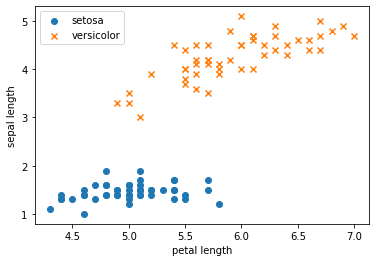

In [2]:
plt.scatter(xData[:50,0], xData[:50,2], marker = 'o', label='setosa')
plt.scatter(xData[50:,0], xData[50:,2], marker = 'x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()


Agora implementamos o algoritmo e vemos como funciona. 

Temos 4 *features* e portanto 4 pesos, em que cada um está associado a uma *feature*. Recordem que definimos um termo bias $w_0$ que assume $x_0=1$, logo temos um total de 5 pesos. 

Definimos o número de iterações (épocas) igual a 10. Este é um dos *hiper-parâmetros*, por oposição aos parâmetros de sistema como $w$, que são aprendidos pelo algoritmo. Em cada iteração, o algoritmo computa a classe (0 ou 1) de todos os pontos de dados, e actualiza os pesos com cada classificação errada. 

Se a amostra é mal classificada, então os pesos são actualizados em $\Delta$ que os empurra na direcção oposta. Então, se a amostra for classificada outra vez, o resultado será "menos errado". 

In [3]:
def perceptron (train, trainLabels, num_iter):
    """
    Trains a binary perceptron, given the train data, with the given trainLabels, and using num_iter iterations
        train and trainLabels must be numpy ndarray objects, num_iter must be a positive integer
        Returns a pair (finalWeights, errors) where:
            finalWeights is a ndarray object with the final weights
            errors is a list with the number of misclassified train examples, for each of the iterations
    """
    # assigns 0 to all the weights (for all the features, including the bias feature)
    w = np.zeros(train.shape[1]+1)    
    misclassified_ = []
    
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(train, trainLabels):
            x = np.insert(x,0,1)   # insert the bias feature
            v = np.dot(w, x.transpose())
            output = 1.0 if (v>0) else 0.0
            
            delta = (label - output)
            
            if delta: # the example is misclassified
                misclassified += 1
                w += (delta*x)
        misclassified_.append(misclassified)
        
    return(w, misclassified_)

num_iter = 10

w, misclassified_ = perceptron (xData, yData, num_iter)


Vamos agora fazer o gráfico do número de amostras mal classificadas em cada iteração. Veremos que o algoritmo converge na 4ª iteração, ou seja, todas as amostras são classificadas correctamente na quarta passagem pelos dados completos

Uma propriedade do Perceptrão é que se o *dataset* for linearmente separável, então o algoritmo garantidamente converge em alguma altura.

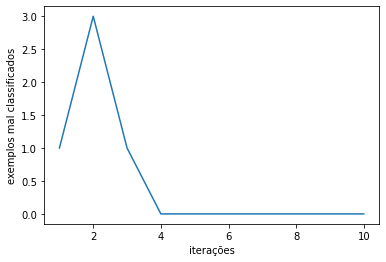

In [4]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterações')
plt.ylabel('exemplos mal classificados')
plt.show()

### Aplicar o perceptrão para classificar novos exemplos:

A função `perceptron_result` calcula o resultado de aplicar o perceptrão encontrado (isto é, o modelo aprendido a partir dos exemplos de treino, ou seja, o ndarray de pesos finais obtidos) a um novo exemplo. 

Esta função vai permitir classificar novos exemplos. O perceptrão é representado pelo seu ndarray de pesos, w. 
O parâmetro `testExample` deve ser também um objecto ndarray com os valores das *features* do exemplo a classificar.


In [5]:
def degrau(v):
    if v <= 0.0:
        return 0
    else:
        return 1

def perceptron_result(testExample, w):
    entrada= np.insert(testExample,0,1)   # insert the bias feature
    return degrau(np.dot(w, entrada))

def imprimeClasse(exemplo, classe):
    print(exemplo, "é da classe", "versicolor" if classe else "setosa")
    
#exemplo
one_iris = np.array([5.1, 3.5, 1.4, 0.2])
imprimeClasse(one_iris, perceptron_result(one_iris, w))

another_iris = np.array([6.4, 3.2, 4.5, 1.5])
imprimeClasse(another_iris, perceptron_result(another_iris, w))


[5.1 3.5 1.4 0.2] é da classe setosa
[6.4 3.2 4.5 1.5] é da classe versicolor


## Limitações

Um perceptrão de uma única camada só funciona se o *dataset* for linearmente separável.

O algoritmo só é usado para problemas de **classificação binária**. No entanto, podemos estender o algoritmo para resolver um problema de classificação com múltiplas classes, introduzindo um perceptrão por classe. Isto é, cada perceptrão dá o resultado 1 ou 0, significando que a amostra pertence ou não a essa classe.

## Outro exemplo simples

Vamos construir e treinar um perceptrão para calcular a conjunção (de duas entradas lógicas) (recebe uma lista com dois valores (0 ou 1) e dá como resultado a sua conjunção)

In [6]:
### Exemplos de teste para a conjunção

xData = np.array([[0,0], [0,1], [1,0], [1,1]])
yData = np.array([0,0,0,1])

# Vamos obter o perceptrão
wConj, errors = perceptron(xData, yData, 8)
print("Nº erros por iteração:", errors)
print("Pesos obtidos para o perceptrão da Conjunção:", wConj)

# Vamos classificar o par [1,1]
print( "conjunção entre ", [1,1], " = ", perceptron_result([1,1], wConj))

# Vamos classificar o par [0,1]
print( "conjunção entre ", [0,1], " = ", perceptron_result([0,1], wConj))

# Agora vamos classificar (obter o resultado) da conjunção de 3 valores [0,1,1]
xData = [0,1,1]
#   Começamos por obter a conjunção dos 2 primeiros valores
twoConjData = xData[0:2]
conj1 = perceptron_result(twoConjData, wConj)
#   Em seguida fazemos a conjunção desse resultado com o terceiro valor
twoConjData = [conj1, xData[2]]
print( "conjunção entre ", xData, " = ",perceptron_result(twoConjData, wConj))


Nº erros por iteração: [1, 3, 3, 2, 1, 0, 0, 0]
Pesos obtidos para o perceptrão da Conjunção: [-2.  2.  1.]
conjunção entre  [1, 1]  =  1
conjunção entre  [0, 1]  =  0
conjunção entre  [0, 1, 1]  =  0


### Exercício 1 

Construir e treinar um perceptrão para calcular a disjunção (de duas entradas lógicas)

In [7]:
### Solução do exercício 1
### disjunção


### Exercício 2

Construir e treinar um perceptrão para calcular um Pseudo-Contador - Com 6 entradas e uma saída. A saída indica se existe pelo menos uma entrada inactiva **e** existe pelo menos uma entrada activa. 
Repare que pode resolver este problema usando mais do que um perceptrão, nomeadamente usando **2 camadas**:
1. um perceptrão para existe_inactiva
1. um perceptrão para existe_activa
1. um perceptrão para a conjunção das saídas dos dois anteriores

Há 64 (2^6) potenciais dados de input. Tentem fornecer alguns exemplos de treino, treinem cada um dos dois primeiros perceptrões e vejam depois com exemplos de teste (novos) se eles já estão correctos. 



In [8]:
# exercício 2.

# Exemplos de Treino e respectivas labels


# 2.1. Perceptrão treinado para existe_inactiva




In [9]:
# 2.2. Perceptrão treinado para existe_activa


In [10]:
# 2.3.
# segunda camada: conjunção usando os pesos (já antes obtidos) wConj



# Limitações das redes neuronais de uma só camada

1. Só podem representar um conjunto limitado de funções. Modelos com funções complicadas vão resultar em redes com precisão baixa na previsão.

1. Só podem aprender dados linearmente separáveis. Mais uma vez, com dados mais complexos, a precisão vai ser baixa

1. As fronteiras de decisão constituem um híper-plano, por exemplo, se os dados se distribuem em 3 dimensões, a fronteira de decisão deve estar em 2 dimensões (neste caso é um plano).



## Camadas escondidas (hidden layers)
### Vantagens

1. Redes com múltiplas camadas podem ser usadas para classificar dados não linearmente separáveis
1. São mais confiáveis quando se comparam com redes de uma só camada



### Exemplo com uma camada escondida

<img src="nn-hidden.png" style="width: 456px;" />


# Usando a classe Perceptron do Scikit-Learn

Vamos agora usar a biblioteca Scikit-learn que já implementa o Perceptrão e o MLP (*Multi-Layer Perceptron*).

Vamos começar por utilizar a classe `Perceptron` sobre **todos** os dados iris (considerando agora portanto as 3 classes), considerando como anteriormente apenas dois dos atributos, *petal length* e *sepal length*.



In [11]:
iris_data = load_iris()
X = iris_data['data'][:, [0, 2]]
y = iris_data['target']
print('Class labels:', np.unique(y), iris_data['target_names'])

Class labels: [0 1 2] ['setosa' 'versicolor' 'virginica']


Vamos separar os dados num conjunto de treino e num conjunto de teste.

Recorde que o scikit-learn tem uma função `train_test_split` que baralha (*shuffle*) o conjunto de dados e divide-o em duas partes. Esta função, por defeito, extrai 75% das linhas do conjunto de dados para o conjunto de treino, com as classes correspondentes. Os restantes 25% dos dados com as respetivas classes constituem o conjunto de teste.

In [12]:
# split on train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
print(X_train.shape)
print(X_test.shape)

(112, 2)
(38, 2)


A classe `Perceptron` permite produzir perceptrões lineares (não aplica nenhuma função de ativação) 
e tem vários argumentos que podem ser escolhidos:

    Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, 
        shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, 
        validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)



Apenas iremos explicar os mais relevantes (e que iremos usar) para este guião:

- `max_iter: default = 1000` - o número máximo de épocas (iterações sobre os dados de treino)
- `shuffle: default = True` - indica se os dados de treino devem ser *shuffled* entre cada época
- `eta0: default = 1.0` - valor do rácio de aprendizagem: constante pela qual é multiplicada a atualização dos pesos 
-  `random_state : default=None ` - usado para fazer o *shuffle* dos dados. Deve-se usar um valor inteiro para que diferentes chamadas produzam o mesmo resultado, quando shuffle = True. 

In [13]:
from sklearn.linear_model import Perceptron

p = Perceptron(max_iter=40, eta0 = 0.8, random_state=1)
p.fit(X_train, y_train)
print("Exactidão no conjunto de treino:",  p.score(X_train, y_train))
print("Exactidão no conjunto de teste:",  p.score(X_test, y_test))

Exactidão no conjunto de treino: 0.8660714285714286
Exactidão no conjunto de teste: 0.9210526315789473


Vejamos o que acontece se usarmos os mesmos dados, mas seleccionando outras duas *features*, *petal length* e *petal width*.

In [14]:
X2 = iris_data['data'][:, [0, 1]]

Vamos primeiro ver se esses dados são linearmente separáveis

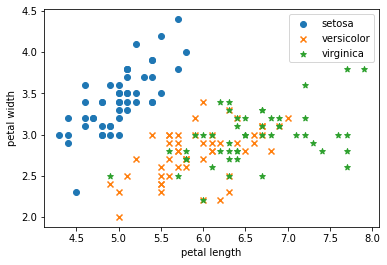

In [15]:
plt.scatter(X2[:50,0], X2[:50,1], marker = 'o', label='setosa')
plt.scatter(X2[50:100,0], X2[50:100,1], marker = 'x', label='versicolor')
plt.scatter(X2[100:,0], X2[100:,1], marker = '*', label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

Como podemos constatar pelo gráfico acima, não são linearmente separáveis.
Vamos ver como se comporta o Perceptron sobre estes dados

In [16]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=2)

p = Perceptron(max_iter=1000, eta0=0.8, random_state=1)
p.fit(X2_train, y_train)
print("Exactidão no conjunto de treino:",  p.score(X2_train, y_train))
print("Exactidão no conjunto de teste:",  p.score(X2_test, y_test))

Exactidão no conjunto de treino: 0.6964285714285714
Exactidão no conjunto de teste: 0.7368421052631579


# Usando a  classe MLPClassifier do Scikit-Learn

A classe MLP do módulo sklearn produz um perceptrão multi-camada, também com os métodos ```fit(X,y)```,  ```predict(X)``` e ```score(X,y)```.


No MLP, o processo de cálculo da soma ponderada do produto das entradas pelos pesos é repetido várias vezes, calculando primeiro uma camada escondida que representa valores intermédios dos cálculos, que são depois novamente combinados usando somas ponderadas, até obter um resultado final. 


## Parâmetros da classe MLPCLassifier

A classe MLPClassifier tem inúmeros parâmetros:

    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, 
        batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, 
        shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
        nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
        epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
        
Vamos aqui detalhar apenas alguns dos mais importantes, que vamos usar neste guião:

- `hidden_layer_sizes: default = (100,)` - indica o número de nós em cada uma das camadas escondidas. Por defeito, há uma única camada escondida com 100 nós, mas podem utilizar-se várias camadas escondidas com diferentes números de nós. Por exemplo, hidden_layer_sizes = (3,3) indica que vão ser usadas 2 camadas escondidas, ambas com 3 nós, como ilustrado na imagem seguinte:


<img src="MLP_two_layers.jpg" style="width: 400px;" />

- `activation: default = 'relu'` - a função de ativação não linear a aplicar antes da saída, que pode ter um dos 3 valores: 'logistic', 'tanh' ou 'relu'.
 

<img src="activationFunctions.png" style="width: 700px;" />

- `learning_rate_init : default=0.001` - o valor do rácio (inicial) de aprendizagem. Este valor manter-se-á constante para todas as épocas, se o parâmetro learning_rate tiver o valor 'constant', que é o seu valor por defeito.

Vamos começar com um exemplo com os dados Iris,  escolhendo algumas *features* para as quais os dados que não sejam linearmente separáveis, que guardámos em ```X2```.

In [17]:
from sklearn.neural_network import MLPClassifier

# MLP usando 'relu' com 1 camada escondida com 100 nós
mlp = MLPClassifier(random_state=1, max_iter = 1000) 
mlp.fit(X2_train, y_train)
print("Conjunto de teste - classe real:")
print(y_test)
print("Conjunto de teste - classe predita:")
print(mlp.predict(X2_test))
print("Exactidão no conjunto de treino:",  mlp.score(X2_train, y_train))
print("Exactidão no conjunto de teste:",  mlp.score(X2_test, y_test))


Conjunto de teste - classe real:
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]
Conjunto de teste - classe predita:
[0 0 1 0 0 2 0 2 2 0 0 0 0 0 2 2 1 1 2 1 2 2 2 1 1 0 0 1 0 2 1 0 1 2 1 0 2
 1]
Exactidão no conjunto de treino: 0.8214285714285714
Exactidão no conjunto de teste: 0.7894736842105263


Vamos experimentar com outros valores de parâmetros, treinando com os mesmos dados.

In [18]:
print("Com função de activação tanh:")
mlp_tan = MLPClassifier(random_state=1, max_iter = 1000, activation = 'tanh') 
mlp_tan.fit(X2_train, y_train)
print("\t Exactidão no conjunto de treino:",  mlp_tan.score(X2_train, y_train))
print("\t Exactidão no conjunto de teste:",  mlp_tan.score(X2_test, y_test))

print("Com função de activação logistic:")
mlp_log = MLPClassifier(random_state=1, max_iter = 1000, activation = 'logistic') 
mlp_log.fit(X2_train, y_train)
print("\t Exactidão no conjunto de treino:",  mlp_log.score(X2_train, y_train))
print("\t Exactidão no conjunto de teste:",  mlp_log.score(X2_test, y_test))

print("Com activação 'relu', reduzindo o número de nós escondidos para 50:")
mlp_50 = MLPClassifier(random_state=1, max_iter = 1000, hidden_layer_sizes = (50,)) 
mlp_50.fit(X2_train, y_train)
print("\t Exactidão no conjunto de treino:",  mlp_50.score(X2_train, y_train))
print("\t Exactidão no conjunto de teste:",  mlp_50.score(X2_test, y_test))

print("Com activação 'relu',  mas com 3 camadas de 10 nós cada:")
mlp_10_10_10 = MLPClassifier(random_state=1, max_iter = 1000, hidden_layer_sizes = (10,10,10)) 
mlp_10_10_10.fit(X2_train, y_train)
print("\t Exactidão no conjunto de treino:",  mlp_10_10_10.score(X2_train, y_train))
print("\t Exactidão no conjunto de teste:",  mlp_10_10_10.score(X2_test, y_test))



Com função de activação tanh:
	 Exactidão no conjunto de treino: 0.8214285714285714
	 Exactidão no conjunto de teste: 0.8157894736842105
Com função de activação logistic:
	 Exactidão no conjunto de treino: 0.8125
	 Exactidão no conjunto de teste: 0.7894736842105263
Com activação 'relu', reduzindo o número de nós escondidos para 50:
	 Exactidão no conjunto de treino: 0.8303571428571429
	 Exactidão no conjunto de teste: 0.7894736842105263
Com activação 'relu',  mas com 3 camadas de 10 nós cada:
	 Exactidão no conjunto de treino: 0.8214285714285714
	 Exactidão no conjunto de teste: 0.8157894736842105


### Exercício 3
Faça agora experiências de modo a treinar um MLP sobre os dados Iris, considerando todas as 4 features.
Procure variar os valores dos parâmetros de modo a maximizar a exatidão no conjunto de teste

In [19]:
# Exercício 3

## MLP sobre um grande conjunto de dados: Breast Cancer Dataset


Vamos agora aplicar um MLPClassifier sobre o conjunto de dados `Breast Cancer Dataset` que contem um maior número de exemplos, cada um deles com um grande número de características

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.data.shape)

(569, 30)


Vamos particionar o conjunto de dados em conjuntos de treino e de teste, para treinar o MLP com valores de argumentos por defeito


In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)
print("Dimensão do conjunto de treino:", X_train.shape)
print("Dimensão do conjunto de teste:",X_test.shape)

mlp_cancer = MLPClassifier(random_state=2)
mlp_cancer.fit(X_train, y_train)
print("Exactidão no conjunto de treino:",  mlp_cancer.score(X_train, y_train))
print("Exactidão no conjunto de teste:",  mlp_cancer.score(X_test, y_test))

Dimensão do conjunto de treino: (426, 30)
Dimensão do conjunto de teste: (143, 30)
Exactidão no conjunto de treino: 0.9225352112676056
Exactidão no conjunto de teste: 0.9300699300699301


Conseguiremos fazer melhor?

## Normalização dos dados

O MLP é sensível à escala das características (*features*), portanto é recomendável normalizar os dados.
Vamos experimentar aplicar o StandardScaler.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# adaptar o escalonador aos dados de treino
scaler.fit(X_train)
print("Valor médio para cada feature:")
print(scaler.mean_)
print("Variância para cada feature:")
print(scaler.var_)
print()

# Agora transformamos os dados (de treino e de teste) usando o escalonador
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finalmente voltamos a treinar o MLP com os dados escalonados
mlp_cancer = MLPClassifier(random_state=2)
mlp_cancer.fit(X_train_scaled, y_train)
print("Exactidão no conjunto de treino com 200 iterações:",  mlp_cancer.score(X_train_scaled, y_train))
print("Exactidão no conjunto de teste com 200 iterações:",  mlp_cancer.score(X_test_scaled, y_test))
print()

# Agora aumentando o número de iterações para obter convergência
mlp_cancer2 = MLPClassifier(random_state=2, max_iter = 1000)
mlp_cancer2.fit(X_train_scaled, y_train)
print("Exactidão no conjunto de treino com 1000 iterações:",  mlp_cancer2.score(X_train_scaled, y_train))
print("Exactidão no conjunto de teste com 1000 iterações:",  mlp_cancer2.score(X_test_scaled, y_test))



Valor médio para cada feature:
[1.41591714e+01 1.92330047e+01 9.21438967e+01 6.58415023e+02
 9.63659859e-02 1.03669601e-01 8.86501308e-02 4.91440610e-02
 1.80473239e-01 6.26169953e-02 4.04795070e-01 1.21222723e+00
 2.84097934e+00 4.06956737e+01 6.98667371e-03 2.50779930e-02
 3.16993207e-02 1.17015352e-02 2.04367559e-02 3.71274953e-03
 1.63168169e+01 2.56379812e+01 1.07459131e+02 8.87647887e+02
 1.32503404e-01 2.52836338e-01 2.69481120e-01 1.15279345e-01
 2.89649296e-01 8.35402582e-02]
Variância para cada feature:
[1.25897899e+01 1.69560914e+01 5.95778595e+02 1.29601275e+05
 1.91507176e-04 2.56274742e-03 6.15051796e-03 1.50334115e-03
 7.65073979e-04 4.68437797e-05 8.22715492e-02 2.97671678e-01
 4.24059952e+00 2.34822947e+03 7.97118325e-06 2.87368746e-04
 9.86694208e-04 3.48784027e-05 6.71240221e-05 6.90226165e-06
 2.39029061e+01 3.66938992e+01 1.15091764e+03 3.43002761e+05
 5.24567414e-04 2.30192036e-02 3.92535849e-02 4.29569997e-03
 3.99642766e-03 3.15927141e-04]



E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactidão no conjunto de treino com 200 iterações: 0.9929577464788732
Exactidão no conjunto de teste com 200 iterações: 0.958041958041958

Exactidão no conjunto de treino com 1000 iterações: 0.9976525821596244
Exactidão no conjunto de teste com 1000 iterações: 0.965034965034965
